In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('Melbourne_house.csv')
df.head()

,Suburban,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Suburban,49 Lithgow St,3,h,1490000.0,S,hockingstuart,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Suburban,59A Turner St,3,h,1220000.0,S,hockingstuart,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Suburban,119B Yarra St,3,h,1420000.0,S,hockingstuart,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Suburban,68 Vida St,3,h,1515000.0,S,hockingstuart,01-04-2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Suburban,92 Clydesdale Rd,2,h,670000.0,S,hockingstuart,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


1.Drop the null values row from the data set.

In [50]:
df_clean = df.dropna()
df_clean.head()


,Suburban,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Suburban,49 Lithgow St,3,h,1490000.0,S,hockingstuart,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Suburban,59A Turner St,3,h,1220000.0,S,hockingstuart,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Suburban,119B Yarra St,3,h,1420000.0,S,hockingstuart,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Suburban,68 Vida St,3,h,1515000.0,S,hockingstuart,01-04-2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Suburban,92 Clydesdale Rd,2,h,670000.0,S,hockingstuart,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


2.Print the unique value from 'SellerG' column.

In [51]:
df_clean['SellerG'].unique()

array(['hockingstuart', 'Cayzer', 'Douglas', 'Bells', 'Miles', 'Jellis',
       'Barlow', 'Hunter', 'Marshall', 'Ray', 'Fletchers', 'Walshe',
       'Noel', 'Philip', 'Buxton', 'Hodges', 'Nelson', 'Point', 'Barry',
       'Stockdale', 'Purplebricks', 'Boran', 'Jas', 'YPA', 'Rombotis',
       'Woodards', 'Biggin', 'Brad', 'J', 'RT', 'Garvey', 'Prowse',
       'Domain', 'Sweeney', 'Donovan', 'Gary', "O'Brien", 'Darras', 'C21',
       'Peter', 'Del', 'Jason', 'Bombay', 'LJ', 'Carter', 'McLennan',
       'buyMyplace', 'Mason', 'Lindellas', 'Parkes', 'Caine',
       'hockingstuart/hockingstuart', 'Morrison', 'Chisholm', 'Kay',
       'Harcourts', 'Love', 'Frank', 'Rendina', 'Win', 'Schroeder',
       'Collins', 'McGrath', 'Eview', 'Aquire', 'Raine', 'Wilson', 'LLC',
       'Roger', 'Darren', 'Buckingham', 'Nick', 'Prof.', 'Greg',
       'Haughton', 'Edward', 'Iconek', "Sotheby's", 'Grantham', 'Hoskins',
       'Benchmark', 'iSell', 'Thomson', 'Alexkarbon', 'Matthew', 'RW',
       'U', 'Vill

3.Print the value count of the region names.

In [52]:
df_clean['Regionname'].value_counts()

Regionname
Northern Metropolitan         7382
Southern Metropolitan         6653
Western Metropolitan          5363
Eastern Metropolitan          4088
South-Eastern Metropolitan    2168
Northern Victoria              239
Eastern Victoria               197
Western Victoria                99
Name: count, dtype: int64

4.How many unique value in postcode column.

In [53]:
df_clean['Postcode'].nunique()

214

5.Number of house in each Suburban value.

In [54]:
print(df.columns.tolist())

['Suburban', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']


In [55]:
df_clean['Suburban'].value_counts()

Suburban
Reservoir           598
Richmond            366
Bentleigh East      345
Preston             323
Craigieburn         317
                   ... 
Olinda                1
Panton Hill           1
Warrandyte South      1
Park Orchards         1
Kalorama              1
Name: count, Length: 354, dtype: int64

6.Which suburban area 3-rooms is maximum.

In [56]:
df_3rooms = df_clean[df_clean["Rooms"] == 3]
df_3rooms["Suburban"].value_counts()


Suburban
Reservoir         311
Preston           169
Bentleigh East    161
Craigieburn       160
Glenroy           152
                 ... 
Monbulk             1
Brookfield          1
Castella            1
Kalorama            1
Kalkallo            1
Name: count, Length: 333, dtype: int64

In [57]:
df_3rooms = df_clean[df_clean["Rooms"] == 3]
df_3rooms["Suburban"].value_counts().idxmax()


'Reservoir'

7.Identify the address of each regions maximum-price house.

In [59]:
max_price_idx = df_clean.groupby("Regionname")['Price'].idxmax()
df_clean.loc[max_price_idx, ['Regionname', 'Address', 'Price']]

,Regionname,Address,Price
32635,Eastern Metropolitan,29 Albion Rd,4600000.0
18101,Eastern Victoria,3 Lords Ri,1175000.0
26823,Northern Metropolitan,40 Berry St,4550000.0
15427,Northern Victoria,133 Benson Rd,2225000.0
150,South-Eastern Metropolitan,33 Dunstan St,4000000.0
23841,Southern Metropolitan,49 Mangarra Rd,8000000.0
19150,Western Metropolitan,126 The Boulevard,3900000.0
32277,Western Victoria,14 Toolern St,892000.0


8.What is the minimum, maximum, and average price of 2 rooms house.


In [60]:
df_2rooms = df_clean[df_clean["Rooms"] == 2]
min_price = df_2rooms["Price"].min()
max_price = df_2rooms["Price"].max()
avg_price = df_2rooms["Price"].mean()
print(f"2-room houses:\n  Min Price: {min_price}\n, Max Price: {max_price}\n, Avg Price: {avg_price:.2f}")



2-room houses:
  Min Price: 228500.0
, Max Price: 4800000.0
, Avg Price: 748428.32


9. Convert the price column value to float.

In [62]:
df["Price"] = df["Price"].astype(float)
df["Price"].dtypes

dtype('float64')

10. Create a pivot table of the region name and council area and count the number of
houses are present.


In [63]:
pd.pivot_table(df_clean, index='Regionname', columns='CouncilArea', aggfunc='size', fill_value=0)


CouncilArea,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,...,Moreland City Council,Murrindindi Shire Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
Regionname,,,,,,,,,,,,,,,,,,,,,
Eastern Metropolitan,904,0,58,0,0,0,0,0,0,0,...,0,0,13,0,0,713,0,0,0,0
Eastern Victoria,0,0,0,0,30,47,0,40,0,0,...,0,0,0,0,0,0,0,0,0,77
Northern Metropolitan,634,0,0,0,0,0,1891,0,0,0,...,1300,0,0,0,0,0,1126,0,717,0
Northern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,1,107,0,0,0,2,0,0,4
South-Eastern Metropolitan,0,0,0,0,0,139,0,324,0,317,...,0,0,0,0,0,0,0,0,0,0
Southern Metropolitan,0,1316,1769,0,0,0,0,0,1250,0,...,0,0,0,699,658,0,0,0,0,0
Western Metropolitan,0,0,0,1485,0,0,0,0,0,0,...,38,0,0,0,0,0,0,670,0,0
Western Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


11. Pivot table of region name and postcode with count of houses.


In [64]:
pd.pivot_table(df_clean, index='Regionname', columns='Postcode', aggfunc='size', fill_value=0)


Postcode,3000,3002,3003,3006,3008,3011,3012,3013,3015,3016,...,3805,3806,3807,3809,3810,3910,3975,3976,3977,3978
Regionname,,,,,,,,,,,,,,,,,,,,,
Eastern Metropolitan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,45,4,4,17,20,0,0,0,2
Northern Metropolitan,126,28,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South-Eastern Metropolitan,0,0,0,0,0,0,0,0,0,0,...,29,0,0,0,0,0,2,8,45,0
Southern Metropolitan,0,0,0,54,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western Metropolitan,0,0,0,0,0,246,340,207,220,162,...,0,0,0,0,0,0,0,0,0,0
Western Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


12. Min, Max, and Average of Distance column

In [66]:
(df_clean['Distance'].min(), df_clean['Distance'].max(), df_clean['Distance'].mean())


(np.float64(0.0), np.float64(48.1), np.float64(12.705032647294665))

 13.Which council area has the lowest number of 3-room houses?

In [67]:
df_3 = df_clean[df_clean['Rooms'] == 3]
df_3['CouncilArea'].value_counts().idxmin()

'Murrindindi Shire Council'

14. Pie chart of property type proportion

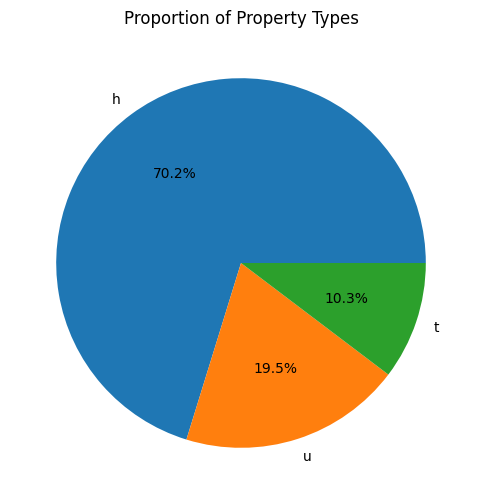

In [68]:
df_clean['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Proportion of Property Types")
plt.ylabel("")
plt.show()

15.Scatter plot of distance vs price.

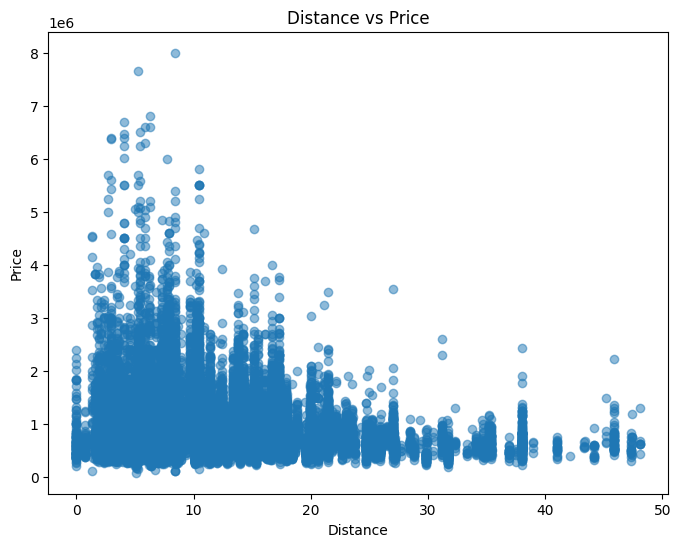

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Distance'], df_clean['Price'], alpha=0.5)
plt.title("Distance vs Price")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.show()

16.Bar chart: property type vs average number of rooms.

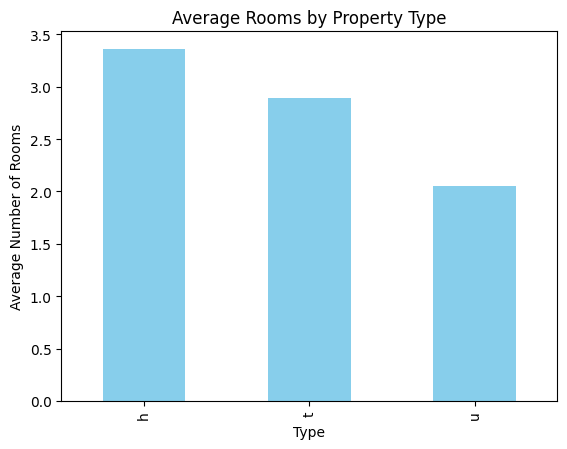

In [70]:
avg_rooms = df_clean.groupby('Type')['Rooms'].mean()
avg_rooms.plot(kind='bar', color='skyblue')
plt.title("Average Rooms by Property Type")
plt.ylabel("Average Number of Rooms")
plt.show()

17.Histogram chart of price column


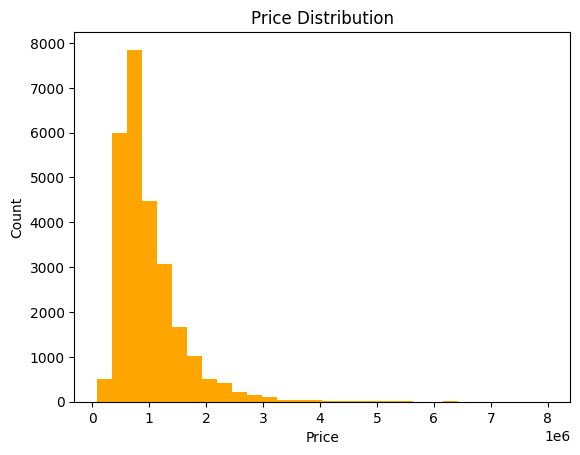

In [71]:
plt.hist(df_clean['Price'], bins=30, color='orange')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


18. Line chart for date vs price